# import libraries

In [1]:
!pip3 install gluoncv
!pip3 install mxnet

     |████████████████████████████████| 1.3 MB 4.9 MB/s 
     |████████████████████████████████| 47.3 MB 87 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
import pandas as pd
import numpy as np
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import os

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


# use SSD model to label data automaticaly

In [3]:
# path_to_imgs = '/content/drive/MyDrive/Car_Images/'
path_to_imgs = '/content/drive/MyDrive/car/8/'

In [4]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)
# net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


100%|██████████| 132723/132723 [00:03<00:00, 38330.52KB/s]


In [11]:
def find_biggest_bbox(scores, bboxes):
  best_index = -1
  best_area = -1
  index = 0
  for bbox in bboxes:
    width = bbox[2]-bbox[0]
    height = bbox[3]-bbox[1]
    area = width * height
    if area >= best_area:
      best_index = index
      best_area = area
    index += 1
  return best_index 

In [10]:
def get_best_bboxes(box_ids, scores, bboxes, threshold=0.98):
  best_scores = []
  best_bboxes = []
  for i in range(100):
    if box_ids[0][i] == net.classes.index("car") and scores[0][i] > threshold:
      best_scores.append(scores[0][i].asnumpy().tolist()[0])
      best_bboxes.append(bboxes[0][i].asnumpy().tolist())
  return best_scores, best_bboxes

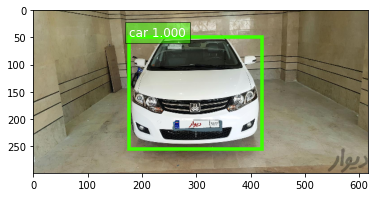

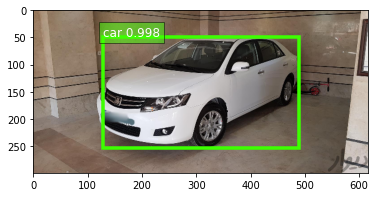

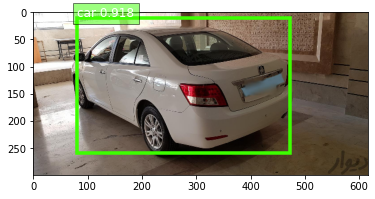

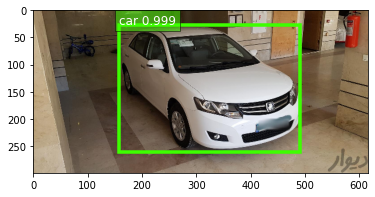

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [40]:
path_to_images = "/content/drive/MyDrive/car/8/"
for filename in os.listdir(path_to_images):
  # image = cv.imread(os.path.join(path_to_images,filename))
  # x, orig_img = data.transforms.presets.rcnn.load_test(path_to_images+filename)
  x, orig_img = data.transforms.presets.ssd.load_test(path_to_images+filename, short=300)
  box_ids, scores, bboxes = net(x)
  best_scores, best_bboxes = get_best_bboxes(box_ids, scores, bboxes, 0.8)
  best_index = find_biggest_bbox(best_scores, best_bboxes)
  if best_index != -1:
    best_bboxes = bboxes[0][best_index].asnumpy()
    best_bboxes = best_bboxes.reshape(1, best_bboxes.shape[0])
    best_scores = scores[0][best_index].asnumpy()
    best_scores = best_scores.reshape(1, best_scores.shape[0])
    best_box_ids = box_ids[0][best_index].asnumpy()
    best_box_ids = best_box_ids.reshape(1, best_box_ids.shape[0])
    # bbox: x1,y1,x2,y2
    ax = utils.viz.plot_bbox(orig_img, best_bboxes, best_scores, best_box_ids,thresh=0.80, class_names=net.classes)
    plt.show()
    # break

In [ ]:
x, orig_img = data.transforms.presets.rcnn.load_test(inputs[0])
box_ids, scores, bboxes = net(x)
box_ids[0].shape

(6000, 1)

In [ ]:
inputs = [path_to_imgs+img for img in img_files]
for i in range(len(inputs)):
  print(inputs[i])
  x, orig_img = data.transforms.presets.ssd.load_test(inputs[i], short=300)
  box_ids, scores, bboxes = net(x)
  print(get_best_bboxes(box_ids, scores, bboxes, 0.8))
  print("*************************************************")

# Pretrained model from an article

In [ ]:
!tar -xzvf "/content/drive/MyDrive/models_VGGNet_VOC0712_SSD_512x512_ft.tar.gz" -C "/content/drive/MyDrive/"

models/VGGNet/VOC0712/SSD_512x512_ft/
models/VGGNet/VOC0712/SSD_512x512_ft/deploy.prototxt
models/VGGNet/VOC0712/SSD_512x512_ft/finetune_ssd_pascal_512.py
models/VGGNet/VOC0712/SSD_512x512_ft/score_ssd_pascal_512_ft.py
models/VGGNet/VOC0712/SSD_512x512_ft/solver.prototxt
models/VGGNet/VOC0712/SSD_512x512_ft/test.prototxt
models/VGGNet/VOC0712/SSD_512x512_ft/train.prototxt
models/VGGNet/VOC0712/SSD_512x512_ft/VGG_VOC0712_SSD_512x512_ft_iter_120000.caffemodel


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
path_to_model = "/content/drive/MyDrive/models/VGGNet/VOC0712/SSD_512x512_ft/"
cvNet = cv.dnn.readNetFromCaffe(path_to_model+'deploy.prototxt',path_to_model+'VGG_VOC0712_SSD_512x512_ft_iter_120000.caffemodel')


In [ ]:
#Labels of network.
classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

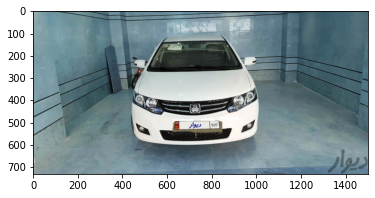

*


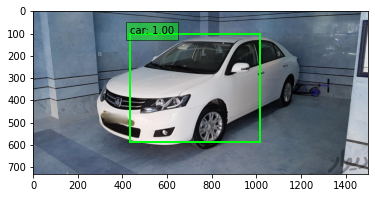

*


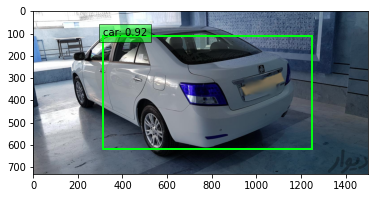

*


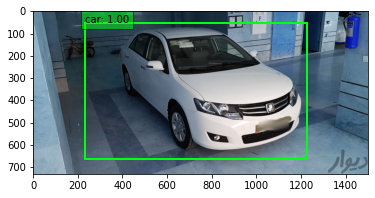

*


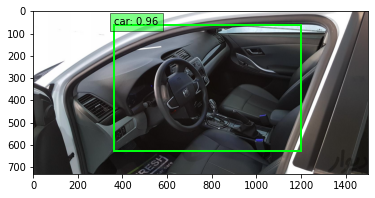

*


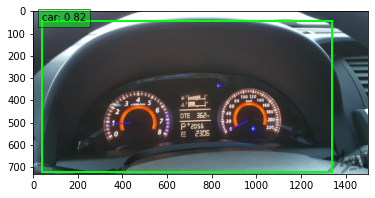

*


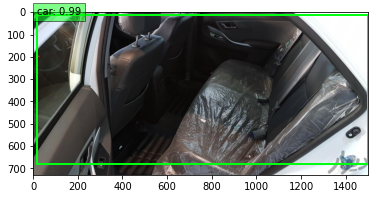

*


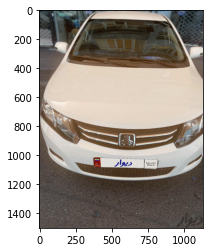

*


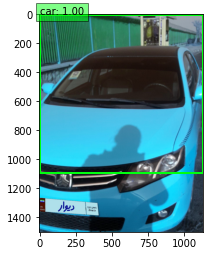

*


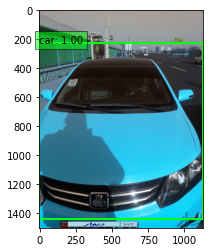

*


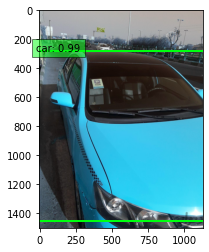

*


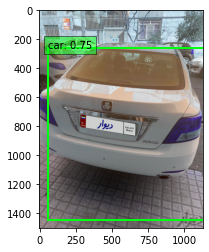

*


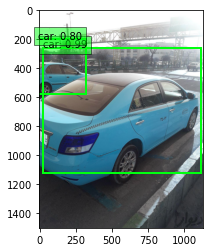

*


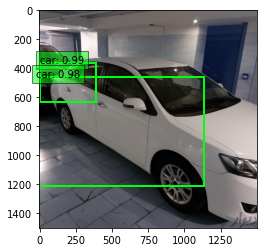

*


KeyboardInterrupt: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
import os
path_to_images = "/content/drive/MyDrive/car/8/"
for filename in os.listdir(path_to_images):
    image = cv.imread(os.path.join(path_to_images,filename))
    blob = cv.dnn.blobFromImage(image, 1, (512,512), (0,0,0), True, crop=False)
    cvNet.setInput(blob)
    detections = cvNet.forward()
    det_label = detections[0,0,:,1]
    det_conf = detections[0,0,:,2]
    det_xmin = detections[0,0,:,3]
    det_ymin = detections[0,0,:,4]
    det_xmax = detections[0,0,:,5]
    det_ymax = detections[0,0,:,6]

    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]
    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_labels = [classNames[index] for index in top_label_indices]
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(image)
    plt.pause(0.01)
    currentAxis = plt.gca()
    print("*")
    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * image.shape[1]))
        ymin = int(round(top_ymin[i] * image.shape[0]))
        xmax = int(round(top_xmax[i] * image.shape[1]))
        ymax = int(round(top_ymax[i] * image.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = top_labels[i]
        display_txt = '%s: %.2f'%(label_name, score)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    # break

In [ ]:
det_label = detections[0,0,:,1]
det_conf = detections[0,0,:,2]
det_xmin = detections[0,0,:,3]
det_ymin = detections[0,0,:,4]
det_xmax = detections[0,0,:,5]
det_ymax = detections[0,0,:,6]